In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import plot, init_notebook_mode
init_notebook_mode(connected=True)
import seaborn as sns
from tqdm import tqdm
from lyft_dataset_sdk.lyftdataset import LyftDataset

In [3]:
DATA_PATH = '/home/vignesh/workspace/lyft_3d/data/proper/3d-object-detection-for-autonomous-vehicles/'

In [4]:
train = pd.read_csv(DATA_PATH + 'train.csv')
sample_submission = pd.read_csv(DATA_PATH + 'sample_submission.csv')     


In [5]:
object_columns = ['sample_id', 'object_id', 'center_x', 'center_y', 'center_z',
                  'width', 'length', 'height', 'yaw', 'class_name']
objects = []
for sample_id, ps in tqdm(train.values[:]):
    object_params = ps.split()
    n_objects = len(object_params)
    for i in range(n_objects // 8):
        x, y, z, w, l, h, yaw, c = tuple(object_params[i * 8: (i + 1) * 8])
        objects.append([sample_id, i, x, y, z, w, l, h, yaw, c])
train_objects = pd.DataFrame(
    objects,
    columns = object_columns
)

100%|██████████| 22680/22680 [00:02<00:00, 10970.70it/s]


In [6]:
numerical_cols = ['object_id', 'center_x', 'center_y', 'center_z', 'width', 'length', 'height', 'yaw']
train_objects[numerical_cols] = np.float32(train_objects[numerical_cols].values)

In [7]:
train_objects.head()

,sample_id,object_id,center_x,center_y,center_z,width,length,height,yaw,class_name
0,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,0.0,2680.282959,698.196899,-18.047768,2.064,5.488,2.053,2.604164,car
1,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,1.0,2691.997559,660.801636,-18.674259,1.818,4.570,1.608,-0.335176,car
2,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,2.0,2713.607422,694.403503,-18.589972,1.779,4.992,1.620,2.579456,car
3,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,3.0,2679.986816,706.910156,-18.349594,1.798,3.903,1.722,2.586166,car
4,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,4.0,2659.352051,719.417480,-18.442999,1.936,4.427,1.921,2.601799,car


In [13]:
train_objects['center_x']

0         2680.282959
1         2691.997559
2         2713.607422
3         2679.986816
4         2659.352051
5         2705.199463
6         2712.706299
7         2755.555176
8         2721.868164
9         2723.602295
10        2683.980225
11        2689.856201
12        2723.442871
13        2701.556396
14        2686.521484
15        2673.040283
16        2728.644531
17        2694.613770
18        2752.257812
19        2647.936035
20        2698.659668
21        2697.523438
22        2670.316406
23        2719.178223
24        2724.560059
25        2642.111816
26        2707.753418
27        2735.453125
28        2710.883545
29        2709.099609
             ...     
638149     487.582611
638150     483.317719
638151     419.278564
638152     410.998199
638153     635.918030
638154     625.650269
638155     611.701782
638156     560.874207
638157     550.725220
638158     583.386963
638159     441.133514
638160     437.824188
638161     475.228485
638162     580.889404
638163    

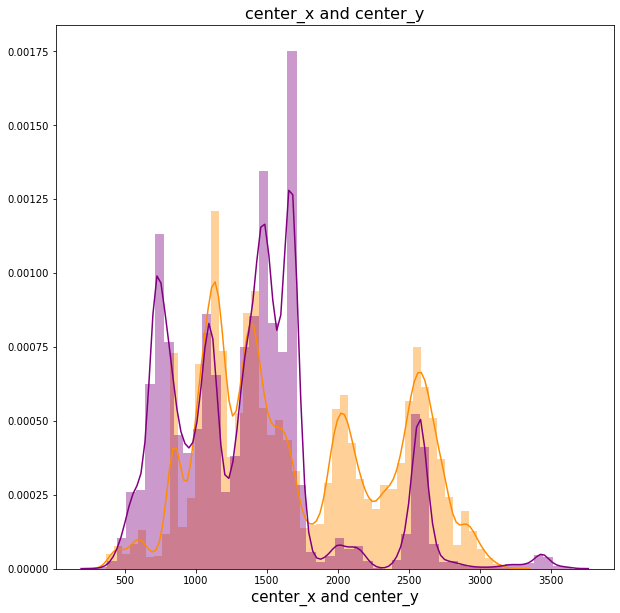

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(train_objects['center_x'], color='darkorange', ax=ax).set_title('center_x and center_y', fontsize=16)
sns.distplot(train_objects['center_y'], color='purple', ax=ax).set_title('center_x and center_y', fontsize=16)
plt.xlabel('center_x and center_y', fontsize=15)
plt.show()


In [15]:
len(train_objects.query('class_name == "car"'))

534911

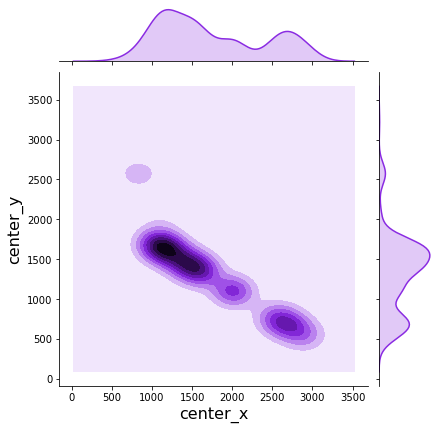

In [16]:
new_train_objects = train_objects.query('class_name == "car"')
plot = sns.jointplot(x=new_train_objects['center_x'][:1000], y=new_train_objects['center_y'][:1000], kind='kde', color='blueviolet')
plot.set_axis_labels('center_x', 'center_y', fontsize=16)
plt.show()

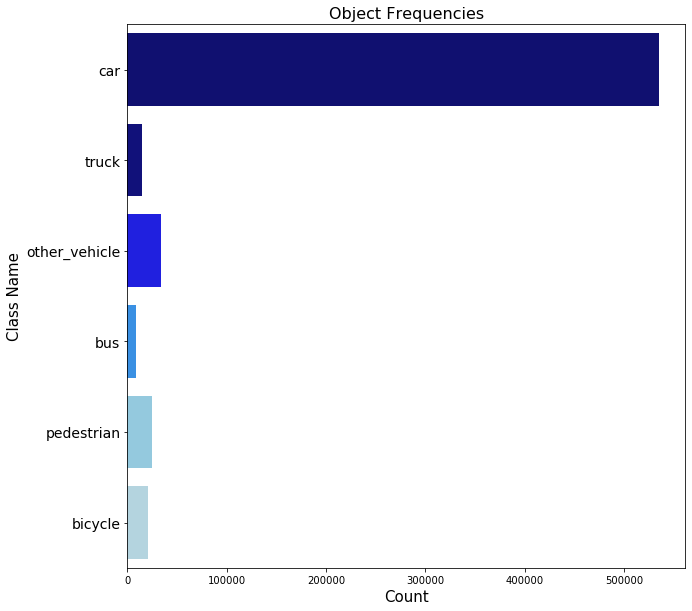

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
plot = sns.countplot(y="class_name", data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"'),
                     palette=['navy', 'darkblue', 'blue', 'dodgerblue', 'skyblue', 'lightblue']).set_title('Object Frequencies', fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Class Name", fontsize=15)
plt.show(plot)


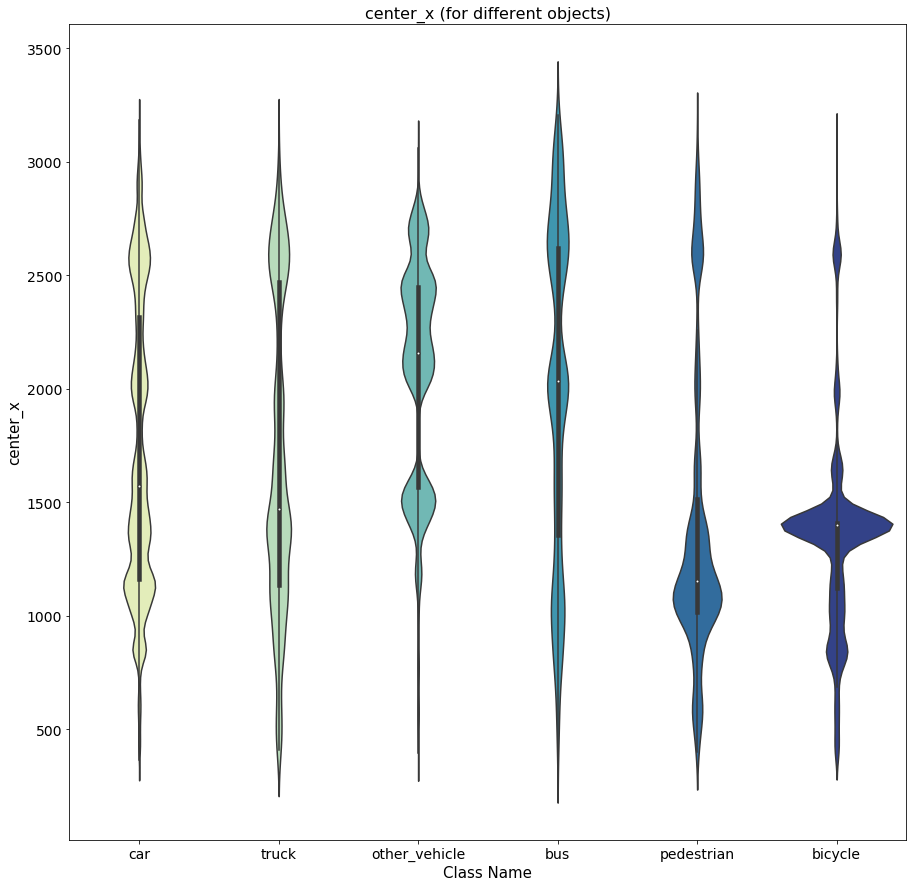

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.violinplot(x="class_name", y="center_x",
                      data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"'),
                      palette='YlGnBu',
                      split=True, ax=ax).set_title('center_x (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("center_x", fontsize=15)
plt.show(plot)